<a href="https://colab.research.google.com/github/HaqqiLucky/WaterQuality/blob/master/kualitas_air_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let the magic begin

In [394]:
# 1. import data sama cek data
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data_sains/09_kualitas_air.csv")

df.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000


In [395]:
# 2. cek data akhir

df.tail()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
2366,NaN,0.0,NaN,7.0,0.3,0.5,14.0,11.111111
2367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.777778
2368,NaN,0.0,3.9,6.5,0.3,1.8,22.0,21.111111
2369,NaN,1.0,NaN,7.0,0.6,1.0,17.0,21.111111
2370,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-17.777778


disini dari data yang terakhir keliatan banyak yang null

In [396]:
# 3. ngecek setiap kolom brp yang null

df.isnull().sum()

,0
Date,5
Salinity (ppt),130
DissolvedOxygen (mg/L),851
pH,95
SecchiDepth (m),73
WaterDepth (m),71
WaterTemp (C),121
AirTemp (C),0


In [397]:
# 4. cek size
df.shape

(2371, 8)

4. Analisis dlu datanya per kolom karena Dissolved oxygen ini banyak banget yang kosong, kalo bisa nanti di hapus aja kolomnya, namun sebelum decide untuk di hapus mending di cek dlu per kolom

Judul dataset kualitas air (water), jadi sesuatu yang berhubungan sama air,
1. Date = cuma tanggal ga ada pengaruhnya sama air => bisa di hapus aja atau ga di ikutin masuk ke df.train/test
2. Saltily = ukuran kadar garam => pengaruh sama kualitas air
3. DissolvedOxygen (mg/L) : Jumlah oksigen yang terlarut dalam air => pengaruh karena menentukan hidup dan mati makhluk air
4. pH = Kebasaan => Pengaruh
5. SecchiDepth (m) = kerjenihan air => pengaruh
6. WaterDepth (m) = kedalaman air => gak pengaruh, karena water depth ini bisa jadi indikator yang mendukung temp, dissolved oxygen yang mana sudah punya kolom sendiri, lagipula kita analisis kualitas, bukan apakah air itu dalem atau engga
7. WaterTemp (C) = temperatur air => pengaruh, jelas
8. AirTemp (C) = temperatur udara => pengaruhnya sama water temp


dapet kesimpulan kalo kita akan hapus date sama water depth nya aja, kemungkinan karena dissolved ini banyak yang kosong jadi, di isi aja pake linear regressi/model yg lain

untukair

In [398]:
# 5. drop kolom
df_new = df.drop(columns=['Date', 'WaterDepth (m)'])
df_new.head()


,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterTemp (C),AirTemp (C)
0,NaN,NaN,7.5,0.3,17.0,-17.777778
1,NaN,12.0,7.5,0.2,17.5,20.500000
2,NaN,NaN,8.0,0.4,23.0,25.000000
3,NaN,12.0,8.0,0.4,25.5,29.000000
4,NaN,NaN,8.5,0.3,28.5,28.000000


In [399]:
# 6. cek shape lagi
df_new.shape

(2371, 6)

In [400]:
#7. cek null lagi
df_new.isnull().sum()

,0
Salinity (ppt),130
DissolvedOxygen (mg/L),851
pH,95
SecchiDepth (m),73
WaterTemp (C),121
AirTemp (C),0


In [401]:
# 8. karena banyak yg kosong, jika 3 kolom kosong maka drop saja
df_cleaner = df_new[df_new.isnull().sum(axis=1) <= 3].copy()
print ("done")

done


In [402]:
# 9. cek shape
df_cleaner.isnull().sum()

,0
Salinity (ppt),108
DissolvedOxygen (mg/L),825
pH,69
SecchiDepth (m),49
WaterTemp (C),96
AirTemp (C),0


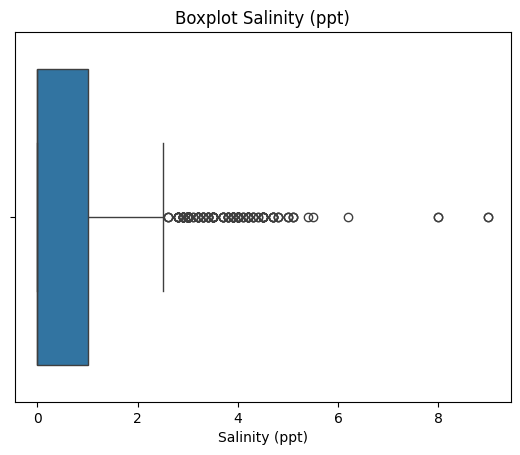

In [403]:
# 10. karena nanti disolved bakal di hapus, jadi jangan di mean dulu untuk yg dissolve
# cek dulu outliernya

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_cleaner["Salinity (ppt)"])
plt.title("Boxplot Salinity (ppt)")
plt.show()

In [404]:
# 11. liat desc
df_cleaner["Salinity (ppt)"].describe()

,Salinity (ppt)
count,2237.000000
mean,0.718350
std,1.231545
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,9.000000


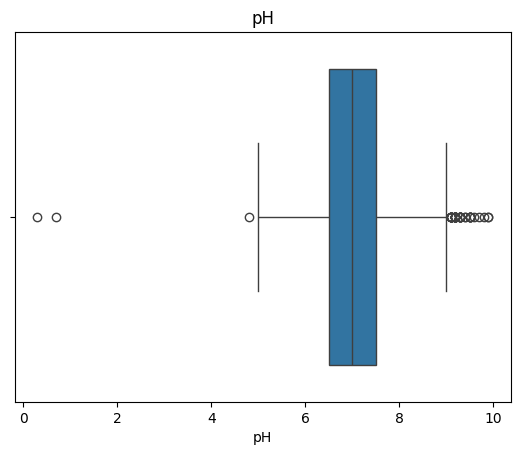

In [405]:
# 12. ph
sns.boxplot(x=df_cleaner["pH"])
plt.title("pH")
plt.show()

In [406]:
# 13 desc ph
df_cleaner["pH"].describe()

,pH
count,2276.000000
mean,7.168212
std,0.788485
min,0.300000
25%,6.500000
50%,7.000000
75%,7.500000
max,9.900000


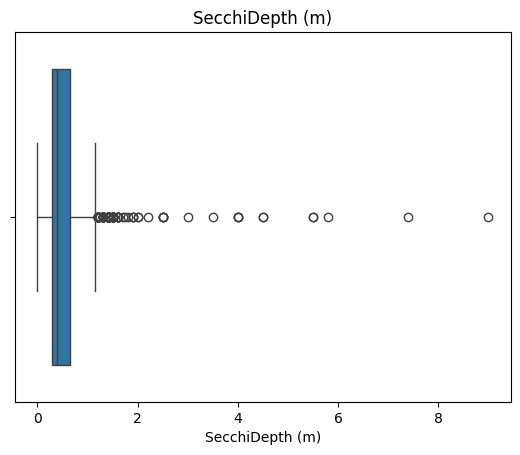

In [407]:
# 14 seci
sns.boxplot(x=df_cleaner["SecchiDepth (m)"])
plt.title("SecchiDepth (m)")
plt.show()

In [408]:
# 15. desc seci
df_cleaner["SecchiDepth (m)"].describe()

,SecchiDepth (m)
count,2296.000000
mean,0.525115
std,0.473766
min,0.000000
25%,0.300000
50%,0.400000
75%,0.650000
max,9.000000


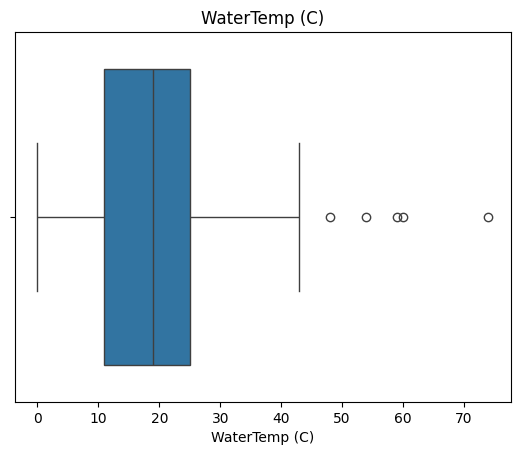

In [409]:
# 16 watertemp
sns.boxplot(x=df_cleaner["WaterTemp (C)"])
plt.title("WaterTemp (C)")
plt.show()

In [410]:
# 17 desc water
df_cleaner["WaterTemp (C)"].describe()

,WaterTemp (C)
count,2249.000000
mean,18.059053
std,8.298801
min,0.000000
25%,11.000000
50%,19.000000
75%,25.000000
max,74.000000


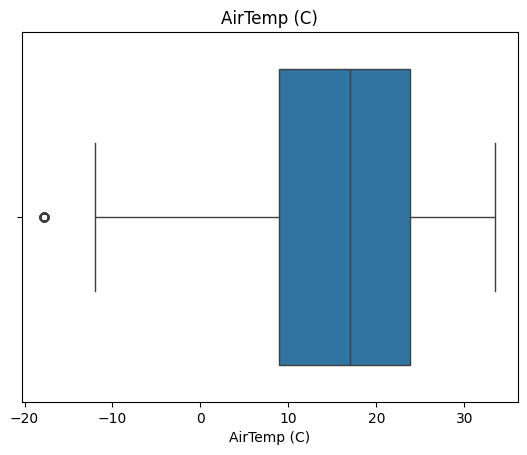

In [411]:
# 18. AirTemp (C)
sns.boxplot(x=df_cleaner["AirTemp (C)"])
plt.title("AirTemp (C)")
plt.show()

In [412]:
# 19. desc air temp
df_cleaner["AirTemp (C)"].describe()

,AirTemp (C)
count,2345.000000
mean,15.823067
std,10.144911
min,-17.777778
25%,8.888889
50%,17.000000
75%,23.888889
max,33.500000


karena ini uda keliatan rata ratanya langsung aja pake IQR dan winsorizing

In [413]:
# 20
cols = ["Salinity (ppt)", "pH", "SecchiDepth (m)", "WaterTemp (C)", "AirTemp (C)"]

for col in cols:
    Q1 = df_cleaner[col].quantile(0.25)
    Q3 = df_cleaner[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaner.loc[df[col] < lower_bound, col] = lower_bound
    df_cleaner.loc[df[col] > upper_bound, col] = upper_bound

print ("done")

done


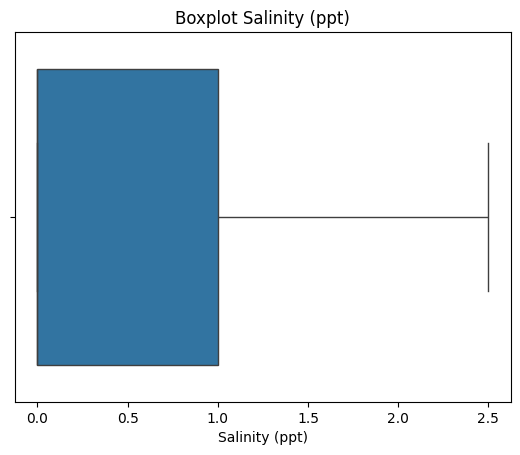

In [414]:
# 21 cek
sns.boxplot(x=df_cleaner["Salinity (ppt)"])
plt.title("Boxplot Salinity (ppt)")
plt.show()

In [415]:
# 23. cek desc
df_cleaner["Salinity (ppt)"].describe()

,Salinity (ppt)
count,2237.000000
mean,0.594837
std,0.913218
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.500000


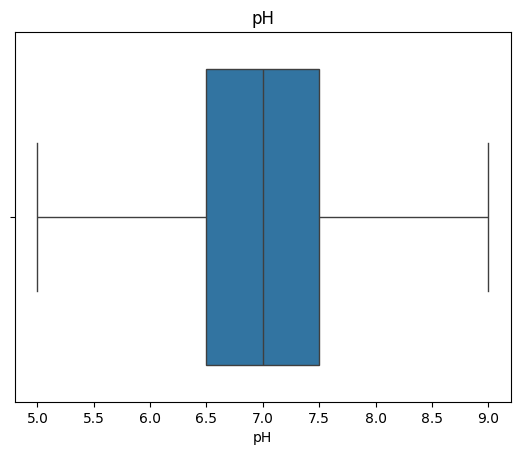

In [416]:
# 24. cek

sns.boxplot(x=df_cleaner["pH"])
plt.title("pH")
plt.show()

In [417]:
# 25 cek desc
df_cleaner["pH"].describe()

,pH
count,2276.000000
mean,7.166279
std,0.749447
min,5.000000
25%,6.500000
50%,7.000000
75%,7.500000
max,9.000000


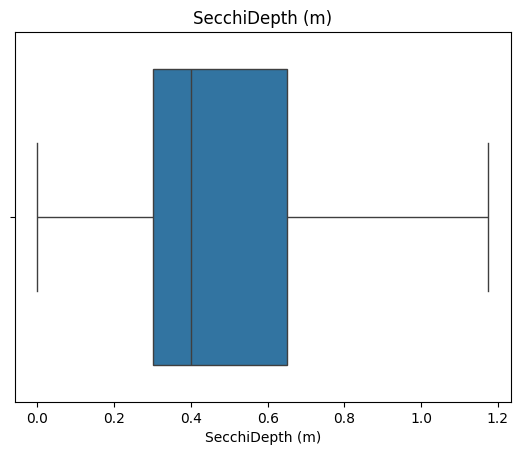

In [418]:
# 26. cek

sns.boxplot(x=df_cleaner["SecchiDepth (m)"])
plt.title("SecchiDepth (m)")
plt.show()

In [419]:
# 27
df_cleaner["SecchiDepth (m)"].describe()

,SecchiDepth (m)
count,2296.000000
mean,0.493114
std,0.285969
min,0.000000
25%,0.300000
50%,0.400000
75%,0.650000
max,1.175000


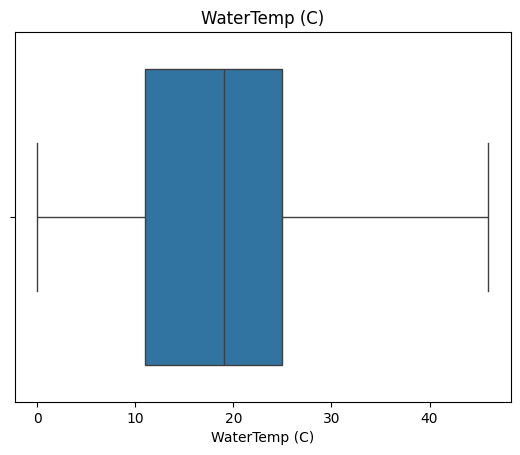

In [420]:
# 28. cek
sns.boxplot(x=df_cleaner["WaterTemp (C)"])
plt.title("WaterTemp (C)")
plt.show()

In [421]:
# 29
df_cleaner["WaterTemp (C)"].describe()

,WaterTemp (C)
count,2249.000000
mean,18.030151
std,8.167747
min,0.000000
25%,11.000000
50%,19.000000
75%,25.000000
max,46.000000


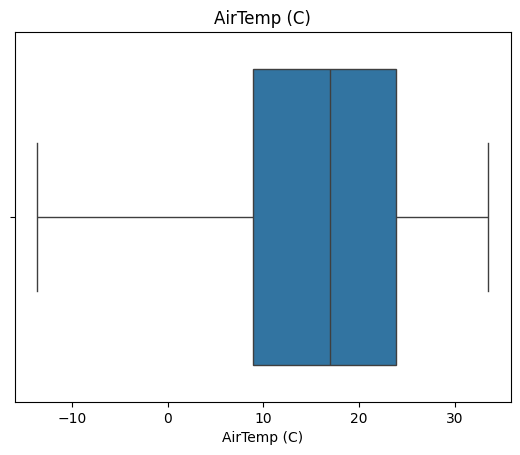

In [422]:
# 30. cek

sns.boxplot(x=df_cleaner["AirTemp (C)"])
plt.title("AirTemp (C)")
plt.show()

In [423]:
# 31
df_cleaner["AirTemp (C)"].describe()

,AirTemp (C)
count,2345.000000
mean,15.936784
std,9.784430
min,-13.611111
25%,8.888889
50%,17.000000
75%,23.888889
max,33.500000


# sekarang ngatasin nilai null

In [424]:
# 32 cek null
df_cleaner.isnull().sum()

,0
Salinity (ppt),108
DissolvedOxygen (mg/L),825
pH,69
SecchiDepth (m),49
WaterTemp (C),96
AirTemp (C),0


In [425]:
# 33 karena data udah ga ada outlier maka bisa pake mean pertama salinity
df_cleaner["Salinity (ppt)"] = df_cleaner["Salinity (ppt)"].fillna(df_cleaner["Salinity (ppt)"].mean())
print ("done")

done


In [426]:
# 34. cek null salinity
df_cleaner["Salinity (ppt)"].isnull().sum()

np.int64(0)

udah ga ada

In [427]:
# 35 pH
df_cleaner["pH"] = df_cleaner["pH"].fillna(df_cleaner["pH"].mean())
print ("done")

done


In [428]:
# 36 cek null
df_cleaner["pH"].isnull().sum()

np.int64(0)

In [429]:
# 37 seci
df_cleaner["SecchiDepth (m)"] = df_cleaner["SecchiDepth (m)"].fillna(df_cleaner["SecchiDepth (m)"].mean())
print ("done")

done


In [430]:
# 38 cek null
df_cleaner["SecchiDepth (m)"].isnull().sum()

np.int64(0)

In [431]:
# 39
df_cleaner["WaterTemp (C)"] = df_cleaner["WaterTemp (C)"].fillna(df_cleaner["WaterTemp (C)"].mean())
print ("done")

done


In [432]:
# 40
df_cleaner["WaterTemp (C)"].isnull().sum()

np.int64(0)

In [433]:
# 41
df_cleaner["AirTemp (C)"] = df_cleaner["AirTemp (C)"].fillna(df_cleaner["AirTemp (C)"].mean())
print ("done")

done


In [434]:
# 42
df_cleaner["AirTemp (C)"].isnull().sum()

np.int64(0)

In [435]:
# 43 cek semua null
df_cleaner.isnull().sum()

,0
Salinity (ppt),0
DissolvedOxygen (mg/L),825
pH,0
SecchiDepth (m),0
WaterTemp (C),0
AirTemp (C),0


DONE

# Sekarang akan di pisah untuk yang kalo disov di hapus, sama yang di imputasi imputasi akan pake linear regressi

# Hapus disov

In [436]:
# 44. drop
df_new_no_disov = df_cleaner.drop(columns=["DissolvedOxygen (mg/L)"])

print ("done")

done


In [437]:
# 45. cek shape
df_new_no_disov.shape

(2345, 5)

In [438]:
# 46. cek null
df_new_no_disov.isnull().sum()

,0
Salinity (ppt),0
pH,0
SecchiDepth (m),0
WaterTemp (C),0
AirTemp (C),0


In [439]:
# 47. cek head
df_new_no_disov.head()


,Salinity (ppt),pH,SecchiDepth (m),WaterTemp (C),AirTemp (C)
0,0.594837,7.5,0.3,17.0,-13.611111
1,0.594837,7.5,0.2,17.5,20.500000
2,0.594837,8.0,0.4,23.0,25.000000
3,0.594837,8.0,0.4,25.5,29.000000
4,0.594837,8.5,0.3,28.5,28.000000


In [440]:
# 47. cek tail
df_new_no_disov.tail()


,Salinity (ppt),pH,SecchiDepth (m),WaterTemp (C),AirTemp (C)
2364,0.1,6.5,0.700,13.0,9.444444
2365,0.0,6.5,1.175,27.0,21.111111
2366,0.0,7.0,0.300,14.0,11.111111
2368,0.0,6.5,0.300,22.0,21.111111
2369,1.0,7.0,0.600,17.0,21.111111


In [441]:
# 48. cek desc
df_new_no_disov.describe()


,Salinity (ppt),pH,SecchiDepth (m),WaterTemp (C),AirTemp (C)
count,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000
mean,0.594837,7.166279,0.493114,18.030151,15.936784
std,0.891932,0.738333,0.282964,7.998741,9.784430
min,0.000000,5.000000,0.000000,0.000000,-13.611111
25%,0.000000,6.500000,0.300000,11.000000,8.888889
50%,0.000000,7.000000,0.400000,18.030151,17.000000
75%,1.000000,7.500000,0.650000,25.000000,23.888889
max,2.500000,9.000000,1.175000,46.000000,33.500000


In [442]:
# 49 sekarang normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_normal_no_disov = pd.DataFrame(
    scaler.fit_transform(df_new_no_disov),
    columns=df_new_no_disov.columns,
    index=df_new_no_disov.index
)

print ("done")

done


In [443]:
# 50 liat head buat cek
df_normal_no_disov.head()

,Salinity (ppt),pH,SecchiDepth (m),WaterTemp (C),AirTemp (C)
0,0.237935,0.625,0.255319,0.369565,0.000000
1,0.237935,0.625,0.170213,0.380435,0.724057
2,0.237935,0.750,0.340426,0.500000,0.819575
3,0.237935,0.750,0.340426,0.554348,0.904481
4,0.237935,0.875,0.255319,0.619565,0.883255


mulai cluster pake k-means

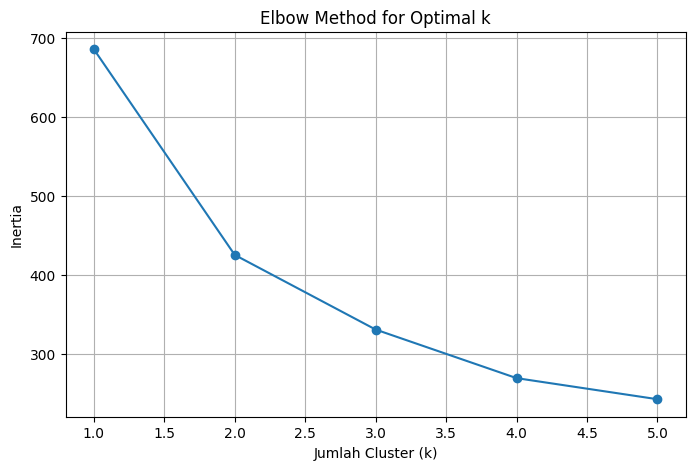

In [444]:
# 51 clustering cari dulu jumlah cluster, disini pake elbow method
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normal_no_disov)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

kalo ga 2 ya 4, tapi coba yang 2 dulu

In [445]:
#52 define kolom baru dengan cluster 2 dulu

kmeans = KMeans(n_clusters=2, random_state=42)
df_normal_no_disov["cluster"] = kmeans.fit_predict(df_normal_no_disov)
print("done")

done


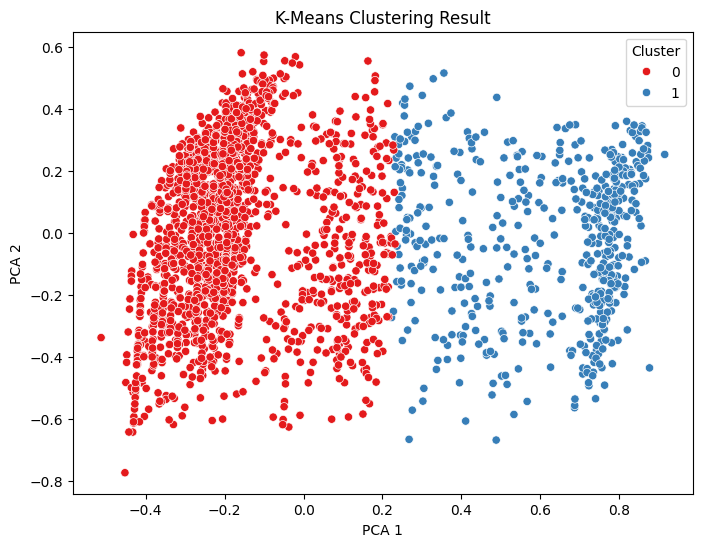

In [446]:
# 53. visualisasi pake pca

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normal_no_disov.drop("cluster", axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_normal_no_disov["cluster"], palette='Set1')
plt.title("K-Means Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


Dari visualisasi itu udah keliatan 3 cluster jelas banget, langsung aja di ganti jadi 3 cluster

In [447]:
# 54. ganti ke 3

kmeans = KMeans(n_clusters=3, random_state=42)
df_normal_no_disov["cluster"] = kmeans.fit_predict(df_normal_no_disov)
print("done")

done


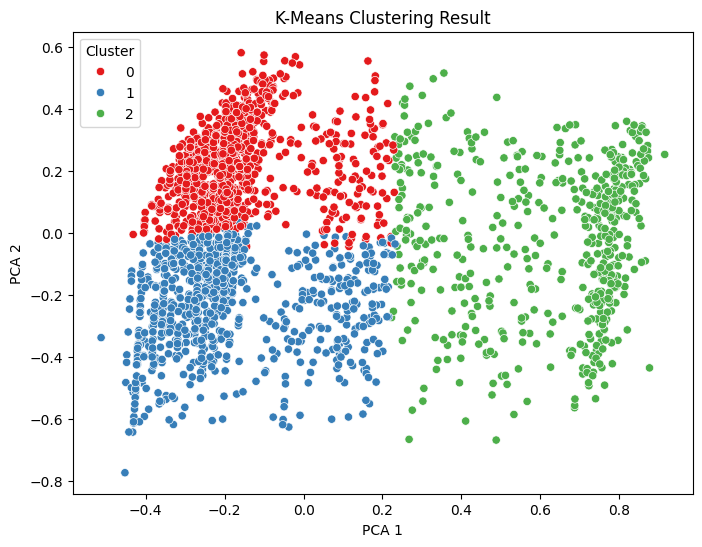

In [448]:
# 55. visualisasi pake pca

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normal_no_disov.drop("cluster", axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_normal_no_disov["cluster"], palette='Set1')
plt.title("K-Means Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


Ok dari sini uda ketemu clusternya 3, sekarang di nilai dulu

In [449]:
# 56 liat score pake siloute score

from sklearn.metrics import silhouette_score

score = silhouette_score(df_normal_no_disov.drop("cluster", axis=1), df_normal_no_disov["cluster"])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2899


lumayan 0.2

In [450]:
# 57 liat insight dari tiap cluster dulu pake group by

df_normal_no_disov.groupby("cluster").mean()

,Salinity (ppt),pH,SecchiDepth (m),WaterTemp (C),AirTemp (C)
cluster,,,,,
0,0.044162,0.538495,0.388279,0.517855,0.772627
1,0.087911,0.467527,0.527723,0.248774,0.448326
2,0.829868,0.665675,0.303698,0.392610,0.649502


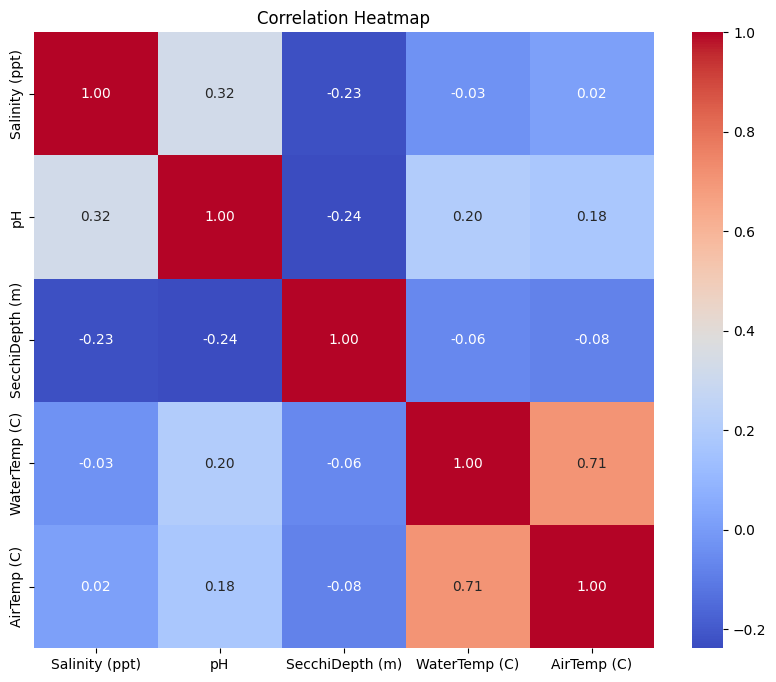

In [451]:
# 58 cek korelasi antar kolom

correlation_matrix = df_new_no_disov.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Simpulan k-means tanpa kolom disolve

untuk cluster 0 bisa di bilang kualitas air nya buruk, kemudian cluster 1 itu rata rata, cluster ke 2 itu bagus kualitasnya. Kemudian kolom korelasi dari heatmap menunjukan :


1.   salinity berkorelasi dengan kolom pH sebanyak 0.32
2.   secci dengan water temp korelasi yg mendekati 0 yaitu sebanyak -0.06
3.   water temp berkorelasi dengan air temp sebanyak 0.71



# Sekarang kalo kita menyertakan kolom disolve dan nilai null nya kita isi pake linear regresi,kemudian di k-means

In [452]:
# 59 panggil lagi variabel yang uda bersih dari outlier dan segala macam kotoran
df_cleaner.isnull().sum()

,0
Salinity (ppt),0
DissolvedOxygen (mg/L),825
pH,0
SecchiDepth (m),0
WaterTemp (C),0
AirTemp (C),0


In [453]:
df_cleaner.shape

(2345, 6)

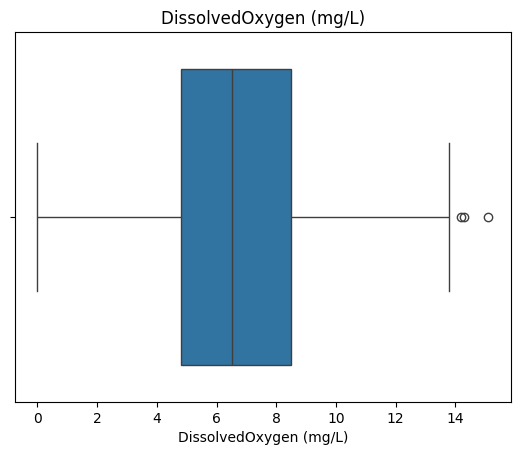

In [454]:
# 60. pertama cek dulu outlier dari disolve

sns.boxplot(x=df_cleaner["DissolvedOxygen (mg/L)"])
plt.title("DissolvedOxygen (mg/L)")
plt.show()

karena keliatan dikit, jadi di hapus aja

In [455]:
#61 cari boundnya pake IQR
Q1 = df_cleaner["DissolvedOxygen (mg/L)"].quantile(0.25)
Q3 = df_cleaner["DissolvedOxygen (mg/L)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"IQR: {IQR:.3f}")
print(f"Lower bound: {lower_bound:.3f}")
print(f"Upper bound: {upper_bound:.3f}")

IQR: 3.700
Lower bound: -0.750
Upper bound: 14.050


In [456]:
# 62 hapus value yang melebihi dari batas lower dan upper
mask_valid = (df_cleaner["DissolvedOxygen (mg/L)"] >= lower_bound) & \
             (df_cleaner["DissolvedOxygen (mg/L)"] <= upper_bound)

df_disolv_not_deleted = df_cleaner[mask_valid | df_cleaner["DissolvedOxygen (mg/L)"].isnull()]
df_disolv_not_deleted.shape
# print ("done")

(2342, 6)

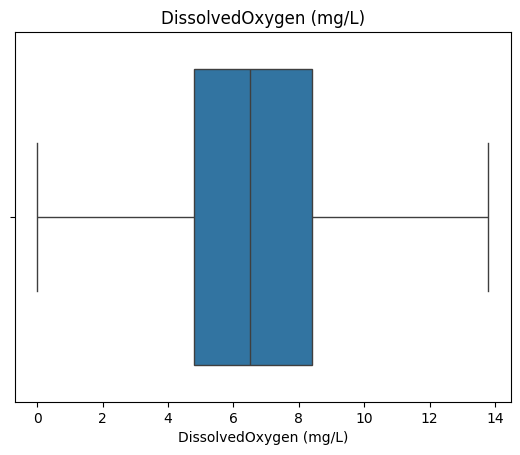

In [457]:
# 63 cek lagi outliernya
sns.boxplot(x=df_disolv_not_deleted["DissolvedOxygen (mg/L)"])
plt.title("DissolvedOxygen (mg/L)")
plt.show()

In [458]:
# 64, ok uda aman
df_disolv_not_deleted.describe()

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterTemp (C),AirTemp (C)
count,2342.000000,1517.000000,2342.000000,2342.000000,2342.000000,2342.000000
mean,0.593336,6.630666,7.166107,0.493426,18.048550,15.952715
std,0.891370,2.484321,0.738577,0.283007,7.987078,9.780480
min,0.000000,0.000000,5.000000,0.000000,0.000000,-13.611111
25%,0.000000,4.800000,6.500000,0.300000,11.500000,8.888889
50%,0.000000,6.500000,7.000000,0.400000,18.030151,17.000000
75%,1.000000,8.400000,7.500000,0.650000,25.000000,23.888889
max,2.500000,13.800000,9.000000,1.175000,46.000000,33.500000


In [459]:
df_disolv_not_deleted.shape

(2342, 6)

In [460]:
# 65, skrng lanjut ke linear regresi, isi nilai nullnya pake prediksi
# cek dulu null nya
df_disolv_not_deleted.isnull().sum()

,0
Salinity (ppt),0
DissolvedOxygen (mg/L),825
pH,0
SecchiDepth (m),0
WaterTemp (C),0
AirTemp (C),0


In [461]:
df_disolv_not_deleted.shape

(2342, 6)

aman

In [462]:
df_disolv_not_deleted.dtypes

,0
Salinity (ppt),float64
DissolvedOxygen (mg/L),float64
pH,float64
SecchiDepth (m),float64
WaterTemp (C),float64
AirTemp (C),float64


In [463]:
bersih = df_disolv_not_deleted.dropna()

In [464]:
kotor = df_disolv_not_deleted.loc[df_disolv_not_deleted["DissolvedOxygen (mg/L)"].isnull()]
kotor

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterTemp (C),AirTemp (C)
0,0.594837,NaN,7.5,0.300,17.0,-13.611111
2,0.594837,NaN,8.0,0.400,23.0,25.000000
4,0.594837,NaN,8.5,0.300,28.5,28.000000
13,0.594837,NaN,7.5,0.200,21.5,22.000000
14,0.594837,NaN,8.0,0.200,8.5,14.000000
...,...,...,...,...,...,...
2362,0.000000,NaN,6.5,0.900,20.0,17.222222
2364,0.100000,NaN,6.5,0.700,13.0,9.444444
2365,0.000000,NaN,6.5,1.175,27.0,21.111111
2366,0.000000,NaN,7.0,0.300,14.0,11.111111


In [465]:
data_dengan_disolv = df_disolv_not_deleted.dropna(subset=["DissolvedOxygen (mg/L)"])
data_tanpa_disolv = df_disolv_not_deleted[df_disolv_not_deleted["DissolvedOxygen (mg/L)"].isnull()]

In [466]:
feature_cols = ["Salinity (ppt)", "pH", "SecchiDepth (m)", "WaterTemp (C)", "AirTemp (C)"]
target_col = "DissolvedOxygen (mg/L)"

X_train = data_dengan_disolv[feature_cols]
y_train = data_dengan_disolv[target_col]

X_pred = data_tanpa_disolv[feature_cols]

print("done: Data split for linear regression")


done: Data split for linear regression


In [467]:
y_train

,DissolvedOxygen (mg/L)
1,12.0
3,12.0
5,1.6
6,6.2
7,5.8
...,...
2357,6.0
2360,5.9
2361,6.2
2363,4.6


In [468]:
# X_train = X_train.columns
# data_predict = kotor[X_train]

In [469]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_pred)

# 69. lalu masukin sekalian ke null
df_disolv_not_deleted.loc[X_pred.index, target_col] = y_pred
print ("done: Imputed missing values using Linear Regression")

done: Imputed missing values using Linear Regression


In [470]:
# 66, skrng di kolom target itu kan udah ada yg ada isinya, nah itu di pisah sama yg null
# print (df_disolv_not_deleted)

# train_data = df_disolv_not_deleted[df_disolv_not_deleted["DissolvedOxygen (mg/L)"].notnull()]
# train_data.isnull().sum()

# # train_data = train_data.drop(columns=feature_cols)

# X_train = train_data[["Salinity (ppt)", "pH", "SecchiDepth (m)", "WaterTemp (C)", "AirTemp (C)"]]
# y_train = train_data["DissolvedOxygen (mg/L)"]

# pred_data = df_disolv_not_deleted[df_disolv_not_deleted["DissolvedOxygen (mg/L)"].isnull()]
# pred_data = pred_data.dropna(subset=["Salinity (ppt)", "pH", "SecchiDepth (m)", "WaterTemp (C)", "AirTemp (C)"])
# X_pred = pred_data[["Salinity (ppt)", "pH", "SecchiDepth (m)", "WaterTemp (C)", "AirTemp (C)"]]

# print ("done")

# kulala = df_disolv_not_deleted.notna()
# kulala


In [471]:
# # 68. mulai prediksi

# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_pred)

# # 69. lalu masukin sekalian ke null
# df_disolv_not_deleted.loc[X_pred.index, target_col] = y_pred
# print ("done")

In [472]:
# 70. akurasi
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_train_pred = model.predict(X_train)
r2_train = model.score(X_train, y_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"R² (Train Data): {r2_train:.3f}")
print(f"Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Mean Squared Error (MSE): {mse_train:.3f}")


R² (Train Data): 0.364
Mean Absolute Error (MAE): 1.564
Mean Squared Error (MSE): 3.920


Udah lumayan

In [473]:
# 71. normalisasi data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_disolv_not_deleted_kmeans = pd.DataFrame(
    scaler.fit_transform(df_disolv_not_deleted),
    columns=df_disolv_not_deleted.columns,
    index=df_disolv_not_deleted.index
)

print ("done")

done


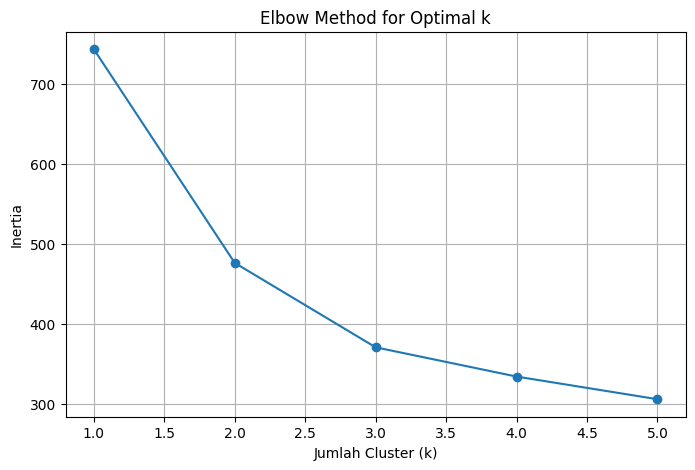

In [474]:
# 72. cari clusternya yg bagus karena ini tambah kolom

from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_disolv_not_deleted_kmeans)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

coba 3 aja sama kayak sebelumnya

In [475]:
# 73 skrg datanya bisa di buat clustering lagi

kmeans = KMeans(n_clusters=3, random_state=42)
df_disolv_not_deleted_kmeans["cluster"] = kmeans.fit_predict(df_disolv_not_deleted_kmeans)
print("done")

done


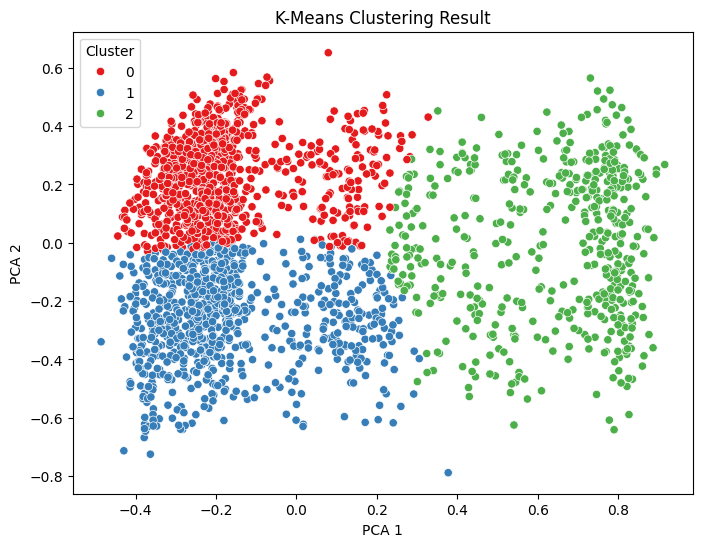

In [476]:
# 74. visualisasi pake pca untuk yg baru

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_disolv_not_deleted_kmeans.drop("cluster", axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_disolv_not_deleted_kmeans["cluster"], palette='Set1')
plt.title("K-Means Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


agak aneh, yg biru merah kok kepotong vertikal, coba yg 2

In [477]:
# 75. cek yg 2
kmeans = KMeans(n_clusters=2, random_state=42)
df_disolv_not_deleted_kmeans["cluster"] = kmeans.fit_predict(df_disolv_not_deleted_kmeans)
print("done")

done


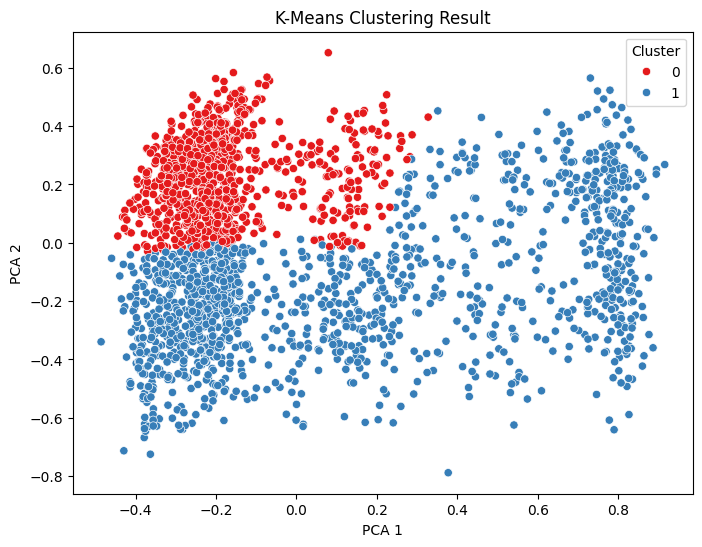

In [478]:
# 76. visualisasi pake pca untuk yg baru lagi

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_disolv_not_deleted_kmeans.drop("cluster", axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_disolv_not_deleted_kmeans["cluster"], palette='Set1')
plt.title("K-Means Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

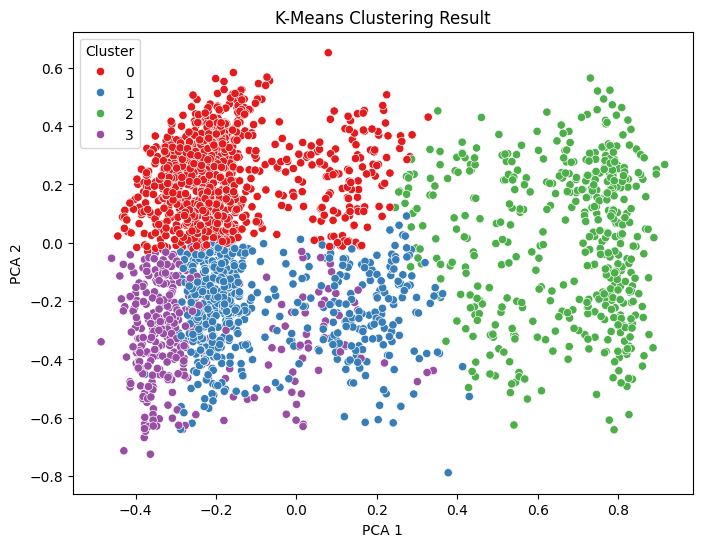

In [479]:
# 77 cek lagi misal 4, prediksiku bakal kayak koordinat kartesius

kmeans = KMeans(n_clusters=4, random_state=42)
df_disolv_not_deleted_kmeans["cluster"] = kmeans.fit_predict(df_disolv_not_deleted_kmeans)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_disolv_not_deleted_kmeans.drop("cluster", axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_disolv_not_deleted_kmeans["cluster"], palette='Set1')
plt.title("K-Means Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

Ok ternyata tidak, berarti yg paling cocok itu yang 3

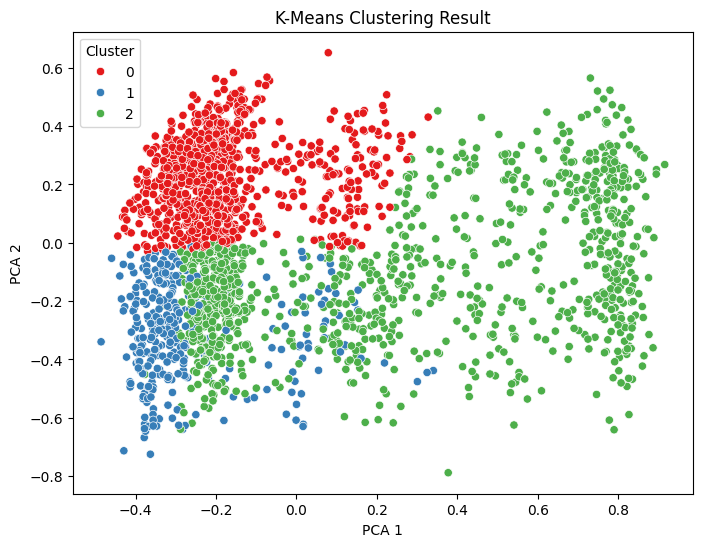

Silhouette Score: 0.2165


In [480]:
# 78. cek akurasi
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
df_disolv_not_deleted_kmeans["cluster"] = kmeans.fit_predict(df_disolv_not_deleted_kmeans)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_disolv_not_deleted_kmeans.drop("cluster", axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_disolv_not_deleted_kmeans["cluster"], palette='Set1')
plt.title("K-Means Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

score = silhouette_score(df_disolv_not_deleted_kmeans.drop("cluster", axis=1), df_disolv_not_deleted_kmeans["cluster"])
print(f"Silhouette Score: {score:.4f}")

ok nilai sedang 0.27

# Kesimpulan akhir

akurasi lebih tinggi pake yg sebelmnya saat disolve itu di hapus yaitu pada nomor 58 dengan 3 cluster


ini penjelasan nomro 58 :

untuk cluster 0 bisa di bilang kualitas air nya buruk, kemudian cluster 1 itu rata rata, cluster ke 2 itu bagus kualitasnya. Kemudian kolom korelasi dari heatmap menunjukan :


1.   salinity berkorelasi dengan kolom pH sebanyak 0.32
2.   secci dengan water temp korelasi yg mendekati 0 yaitu sebanyak -0.06
3.   water temp berkorelasi dengan air temp sebanyak 0.71

